In [17]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import warnings
import hvplot.pandas
import numpy as np
import seaborn as sns
import yfinance as yf
#import scipy.stats as stats

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

%matplotlib inline

In [18]:
# Load .env enviroment variables
load_dotenv('.env')

True

# Part 1 - Litecoin and Chainlink Cryptocurrency Analysis

In [19]:
# Create a ticker for Litecoin and Chainlink
tickers = ["LTC", "LINK"]

In [20]:
# Crypto API URLs
ltc_url = "https://api.alternative.me/v2/ticker/Litecoin/?convert=USD"
chl_url = "https://api.alternative.me/v2/ticker/Chainlink/?convert=USD"
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"

In [21]:
# Fetch current LTC price

response_data_ltc=requests.get(ltc_url)
print(response_data_ltc)
response_content_ltc = response_data_ltc.content
data_ltc = response_data_ltc.json()

#print(json.dumps(data_ltc, indent=4))

ltc_df = data_ltc['data']
#display(ltc_df)

my_ltc=ltc_df['2']['name']

my_ltc_value=ltc_df['2']['quotes']['USD']['price']

# Fetch current CHL price

response_data_chl=requests.get(chl_url)
print(response_data_chl)
response_content_chl = response_data_chl.content
data_chl = response_data_chl.json()

#print(json.dumps(data_chl, indent=4))

chl_df = data_chl['data']

my_chl=chl_df['1975']['name']
# Compute current value of my crpto
# YOUR CODE HERE!
my_chl_value=chl_df['1975']['quotes']['USD']['price']


# Print current crypto wallet balance
print(f"The current value of your {my_ltc} LTC is ${my_ltc_value:0.2f}")
print(f"The current value of your {my_chl} CHL is ${my_chl_value:0.2f}")

<Response [200]>
<Response [200]>
The current value of your Litecoin LTC is $50.87
The current value of your Chainlink CHL is $6.95


In [22]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv ("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca key Type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key Type: {type(alpaca_secret_key)}")
# Create the Alpaca API object
alpaca = tradeapi.REST (
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2" )

Alpaca key Type: <class 'str'>
Alpaca Secret Key Type: <class 'str'>


### 1.1 Create Dataframe for Litecoin and Chainlink

In [23]:
# Set start and end dates of five years
start_date = pd.Timestamp('2017-09-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-28', tz='America/New_York').isoformat()
timeframe = "1Day"

# Get current closing prices for Litcoin and Chainlink

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Generating dataframe for Litcoin and Chainlink
LTC = df_portfolio [df_portfolio ['symbol'] == 'LTC'].drop('symbol', axis=1)
LINK = df_portfolio [df_portfolio ['symbol'] == 'LINK'].drop('symbol', axis=1)
df_portfolio.head()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-09-28 04:00:00+00:00,7.21,7.3788,5.87,6.02,12941,77,6.734449,LINK
2017-09-29 04:00:00+00:00,6.04,6.8795,6.60,6.60,1705,31,6.820661,LINK
2017-10-02 04:00:00+00:00,6.87,6.8700,6.87,6.87,0,0,0.000000,LINK
2017-10-03 04:00:00+00:00,6.87,6.8700,6.87,6.87,0,0,0.000000,LINK
2017-10-04 04:00:00+00:00,6.87,6.8700,6.87,6.87,0,0,0.000000,LINK


### 1.2 Create Dataframe for Bitcoin 

In [24]:
# Fetch current BTC price

response_data_btc=requests.get(btc_url)
print(response_data_btc)
response_content_btc = response_data_btc.content
data_btc = response_data_btc.json()

#print(json.dumps(data_btc, indent=4))

btc_df = data_btc['data']
#display(btc_df)


my_btc=btc_df['1']['name']

my_btc_value=btc_df['1']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")

<Response [200]>
The current value of your Bitcoin BTC is $19172.36


In [25]:
# Set start and end dates of five years
ticker_btc = ['BTCUSD']
start_date = pd.Timestamp('2017-09-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-28', tz='America/New_York').isoformat()
timeframe = "1Day"

# Get dataframe for Bitcoin

df_btc = alpaca.get_crypto_bars(
    ticker_btc,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize and clean up the Bitcoin DataFrame
BTC = df_btc [df_btc['symbol'] == 'BTCUSD'].drop('symbol', axis=1)
df_btc = df_btc.drop(columns = ['open', 'high', 'low', 'volume', 'trade_count', 'vwap'])
df_btc.index = df_btc.index.date
df_btc.head()


,exchange,close,symbol
2017-09-28,CBSE,4073.20,BTCUSD
2017-09-29,CBSE,4156.99,BTCUSD
2017-09-30,CBSE,4300.97,BTCUSD
2017-10-01,CBSE,4419.99,BTCUSD
2017-10-02,CBSE,4412.43,BTCUSD


In [26]:
# Daily return for Bitcoin
daily_return_btc = df_btc['close'].pct_change()
daily_return_btc = daily_return_btc.dropna()
daily_return_btc.head()

2017-09-29    0.020571
2017-09-30    0.034636
2017-10-01    0.027673
2017-10-02   -0.001710
2017-10-03   -0.023592
Name: close, dtype: float64

### 1.3 Combine Litecoin and Chainlink as a portfolio

In [27]:
# Concatenate the cryptocurrency portfolio DataFrames for Litecoin and Chainlink
df_portfolio_crypto = pd.concat([LTC, LINK],axis=1, keys=['LTC','LINK'])
df_portfolio_crypto.head()

LTC                                           \
                            open   high    low  close  volume trade_count   
timestamp                                                                   
2017-09-28 04:00:00+00:00  46.71  47.00  46.55  46.87  276339        3124   
2017-09-29 04:00:00+00:00  47.00  47.08  46.60  46.98  264392        2733   
2017-10-02 04:00:00+00:00  46.93  47.15  46.62  47.10  199240        2153   
2017-10-03 04:00:00+00:00  47.09  47.28  46.64  47.06  231134        2382   
2017-10-04 04:00:00+00:00  47.09  47.13  46.80  47.00  138603        1745   

                                      LINK                               \
                                vwap  open    high   low close   volume   
timestamp                                                                 
2017-09-28 04:00:00+00:00  46.844259  7.21  7.3788  5.87  6.02  12941.0   
2017-09-29 04:00:00+00:00  46.891042  6.04  6.8795  6.60  6.60   1705.0   
2017-10-02 04:00:00+00:00  46.995466  6.87  6.8700  6.87  6.87      0.0   
2017-10-03 04:00:00+00:00  47.031459  6.87  6.8700  6.87  6.87      0.0   
2017-10-04 04:00:00+00:00  46.999983  6.87  6.8700  6.87  6.87      0.0   

                                                 
                          trade_count      vwap  
timestamp                                        
2017-09-28 04:00:00+00:00        77.0  6.734449  
2017-09-29 04:00:00+00:00        31.0  6.820661  
2017-10-02 04:00:00+00:00         0.0  0.000000  
2017-10-03 04:00:00+00:00         0.0  0.000000  
2017-10-04 04:00:00+00:00         0.0  0.000000

In [28]:
# Create and empty Dataframe for closing prices
df_crypto_price = pd.DataFrame()

# Fetch the closing prices of LTC and LINK
df_crypto_price["LTC"] = df_portfolio_crypto["LTC"]["close"]
df_crypto_price["LINK"] = df_portfolio_crypto["LINK"]["close"]


# Drop the time component of the date
df_crypto_price.index = df_crypto_price.index.date

# Drop the null value for cryptocurrency portfolio
df_crypto_price = df_crypto_price.dropna()
df_crypto_price.head()

,LTC,LINK
2017-09-28,46.87,6.02
2017-09-29,46.98,6.60
2017-10-02,47.10,6.87
2017-10-03,47.06,6.87
2017-10-04,47.00,6.87


### 1.4 Create line graph to show Litecoin and Chainlink closed price performance

In [32]:
# 5 years closed price performance for Litecoin and Chainlink
crypto_port_plot = df_crypto_price.hvplot(
    xlabel='Year',
    ylabel='Closed Price',
    title='Five Years Closed PricePerformance for Litecoin vs Chainlink')

crypto_port_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

From this graph, we can see that Litecoin daily closed price is higher than Chainlink. Price fluctuation for Litecoin are between 30 to 55 for these 5 years.
For Chainlink, the price fluctuation are between 2 to 20 for these 5 years. 

### 1.5 What are the daily return, standard deviation, covariance/variance, correlation and Beta? 

In [112]:
#  Daily Return for both cryptocurrency
df_daily_return_crypto = df_crypto_price.pct_change()
df_daily_return_crypto = df_daily_return_crypto.dropna()
df_daily_return_crypto.head()

,LTC,LINK
2017-09-29,0.002347,0.096346
2017-10-02,0.002554,0.040909
2017-10-03,-0.000849,0.000000
2017-10-04,-0.001275,0.000000
2017-10-05,-0.002766,0.164483


In [113]:
# Mean of closed price for both Litecoin and Chainlink
mean_return_crypto = df_crypto_price.mean()
mean_return_crypto

LTC     41.549158
LINK     6.067718
dtype: float64

In [114]:
# Standard deviation of both Litecoin and Chainlink
standard_dev_crypto = df_daily_return_crypto.std()
standard_dev_crypto

LTC     0.013724
LINK    0.247058
dtype: float64

In [115]:
# Variance for cryptocurrency
variance_crypto = df_daily_return_crypto.var()
variance_crypto

LTC     0.000188
LINK    0.061038
dtype: float64

In [116]:
# Covariance for cryptocurrency
covariance_crypto = df_daily_return_crypto.cov()
covariance_crypto

,LTC,LINK
LTC,0.000188,-0.000460
LINK,-0.000460,0.061038


In [117]:
# Correlation for cryptocurrency
correlation_crypto = df_daily_return_crypto.corr()
correlation_crypto

,LTC,LINK
LTC,1.000000,-0.135676
LINK,-0.135676,1.000000


<AxesSubplot:>

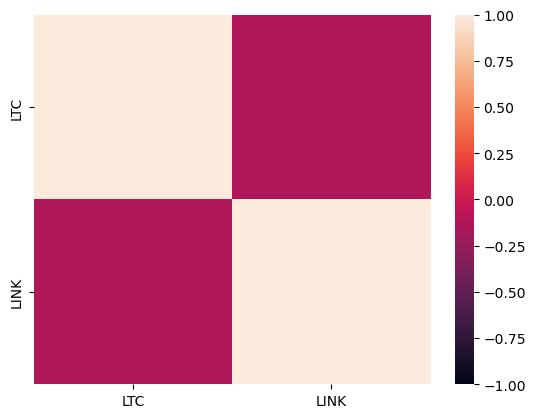

In [118]:
# # Visualize correlation between Litcoin and Chainlink
sns.heatmap(correlation_crypto, vmin=-1, vmax=1)

In [119]:
# Beta for Litcoin
ltc_corvariance = df_daily_return_crypto['LTC'].cov(daily_return_btc)
btc_variance = daily_return_btc.var()
beta_ltc = ltc_corvariance / btc_variance

#beta_ltc
print(f"Beta for Litecoin is {beta_ltc: 2f}%")

Beta for Litecoin is  0.026514%


In [120]:
# Beta for Chainlink
link_corvariance = df_daily_return_crypto['LINK'].cov(daily_return_btc)
beta_link = link_corvariance / btc_variance

#beta_ltc
print(f"Beta for Chainlink is {beta_link: 2f}%")

Beta for Chainlink is  0.096701%


In [121]:
# Calculate cumulative return for crptocurrency
crypto_cumulative_returns = (1 + df_daily_return_crypto).cumprod() - 1

crypto_cumulative_returns['LTC'] = crypto_cumulative_returns['LTC'].round(5)
crypto_cumulative_returns['LINK'] = crypto_cumulative_returns['LINK'].round(5)
crypto_cumulative_returns.head()

,LTC,LINK
2017-09-29,0.00235,0.09635
2017-10-02,0.00491,0.14120
2017-10-03,0.00405,0.14120
2017-10-04,0.00277,0.14120
2017-10-05,0.00000,0.32890


### 1.6 Create line graph for cumulative return for both Litecoin and Chainlink

In [122]:
# Ploting cummualative return for cryptocurrency
crypto_cumulative_returns.hvplot(xlabel='Year',ylabel='Cumulative Return Percentage', title='Cumulative Return Percentage for Litecoin vs Chainlink')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [ ]:
The cumulative return for Litecoin and Chainlink are also flucatuated.From June 2018 to Dec 2019, Chainlink cumulative return% is lower than Litecoin. 

In [123]:
# Annualized Sharpe Ratios for cryptocurrency portfolio
annual_sharpe_ratios = (crypto_cumulative_returns.mean()*252) / (crypto_cumulative_returns.std() * np.sqrt(252))
annual_sharpe_ratios

LTC    -17.042971
LINK     0.216329
dtype: float64

### 1.7 Investment performance on cryptocurrency portfolio

In [124]:
# Set initial investment
initial_investment_crypto = 20000

# Set weights
weights_crypto = [0.5, 0.5]

# Calualte the investment on cryptocurrency by weighted daily return
crypto_returns = df_daily_return_crypto.dot(weights_crypto)

# Multiply the initial investment of $10,000 against the portfolio's series of cumulative returns
crypto_cumulative_profits = (initial_investment_crypto * crypto_cumulative_returns)

# Plot the cumulatives return
crypto_cumulative_profits.hvplot(xlabel='Year', ylabel='Investment Profit', title="Profit Performance for Investment on Litecoin and Chainlink")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

From the graph of investment on Litcoin and Chainlink, Chainlink is risky, Litcoin is less risky. We will earn money from Chainlink but we will lose money from Litcoin.

# Part 2 - Apple and Tesla Stock Analysis

### 2.1 Import Data for Apple stock price

In [33]:
# Download datafram for Apple from Yahoo Finance
appl_df = yf.download('AAPL', start='2017-9-29', end='2022-09-29', progress=False)
appl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-29 00:00:00-04:00,38.302502,38.532501,38.000000,38.529999,36.567490,105199200
2017-10-02 00:00:00-04:00,38.564999,38.612499,38.180000,38.452499,36.493935,74795200
2017-10-03 00:00:00-04:00,38.502499,38.772499,38.477501,38.619999,36.652905,64921200
2017-10-04 00:00:00-04:00,38.407501,38.465000,38.115002,38.369999,36.415634,80655200
2017-10-05 00:00:00-04:00,38.544998,38.860001,38.512501,38.847500,36.868816,85135200


In [34]:
# Drop the time component of the date
appl_df.index = appl_df.index.date
display(appl_df.head())
display(appl_df.tail())

,Open,High,Low,Close,Adj Close,Volume
2017-09-29,38.302502,38.532501,38.000000,38.529999,36.567490,105199200
2017-10-02,38.564999,38.612499,38.180000,38.452499,36.493935,74795200
2017-10-03,38.502499,38.772499,38.477501,38.619999,36.652905,64921200
2017-10-04,38.407501,38.465000,38.115002,38.369999,36.415634,80655200
2017-10-05,38.544998,38.860001,38.512501,38.847500,36.868816,85135200


,Open,High,Low,Close,Adj Close,Volume
2022-09-22,152.380005,154.470001,150.910004,152.740005,152.740005,86652500
2022-09-23,151.190002,151.470001,148.559998,150.429993,150.429993,95939200
2022-09-26,149.660004,153.770004,149.639999,150.770004,150.770004,93339400
2022-09-27,152.740005,154.720001,149.949997,151.759995,151.759995,84442700
2022-09-28,147.639999,150.639999,144.839996,149.839996,149.839996,146691400


In [35]:
# Drop unrelated columns, leave Closed price only
appl_df = appl_df.drop(columns=['Volume', 'Open', 'High', 'Low', 'Adj Close'])
appl_df.head()

,Close
2017-09-29,38.529999
2017-10-02,38.452499
2017-10-03,38.619999
2017-10-04,38.369999
2017-10-05,38.847500


In [36]:
# Rename the column name to APPLE
columns = ['APPLE']
appl_df.columns = columns
appl_df.head()

,APPLE
2017-09-29,38.529999
2017-10-02,38.452499
2017-10-03,38.619999
2017-10-04,38.369999
2017-10-05,38.847500


In [37]:
# Check if there are any null value
appl_df.isnull().sum()

APPLE    0
dtype: int64

### 2.2 Import data for Tesla stock price

In [38]:
# Import dataframe for Tesla from Yahoo Finance
tesla_df = yf.download('TSLA', start='2017-9-29', end='2022-09-29', progress=False)
tesla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-29 00:00:00-04:00,22.790667,22.978666,22.573334,22.740000,22.740000,76606500
2017-10-02 00:00:00-04:00,22.834667,22.913334,22.367332,22.768667,22.768667,79302000
2017-10-03 00:00:00-04:00,22.393333,23.236668,22.085333,23.209333,23.209333,152304000
2017-10-04 00:00:00-04:00,23.416668,23.908001,23.306667,23.667334,23.667334,122452500
2017-10-05 00:00:00-04:00,23.733334,23.829332,23.423332,23.688667,23.688667,62575500


In [39]:
# Drop the time component of the date
tesla_df.index = tesla_df.index.date
display(tesla_df.head())
display(tesla_df.tail())

,Open,High,Low,Close,Adj Close,Volume
2017-09-29,22.790667,22.978666,22.573334,22.740000,22.740000,76606500
2017-10-02,22.834667,22.913334,22.367332,22.768667,22.768667,79302000
2017-10-03,22.393333,23.236668,22.085333,23.209333,23.209333,152304000
2017-10-04,23.416668,23.908001,23.306667,23.667334,23.667334,122452500
2017-10-05,23.733334,23.829332,23.423332,23.688667,23.688667,62575500


,Open,High,Low,Close,Adj Close,Volume
2022-09-22,299.859985,301.290009,285.820007,288.589996,288.589996,70545400
2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800


In [40]:
# Drop Volume, Open, High and Low, leave Closed price only
tesla_df = tesla_df.drop(columns=['Volume', 'Open', 'High', 'Low', 'Adj Close'])
tesla_df.head()

,Close
2017-09-29,22.740000
2017-10-02,22.768667
2017-10-03,23.209333
2017-10-04,23.667334
2017-10-05,23.688667


In [41]:
# Rename the column name to TESLA
columns = ['TESLA']
tesla_df.columns = columns
tesla_df.head()

,TESLA
2017-09-29,22.740000
2017-10-02,22.768667
2017-10-03,23.209333
2017-10-04,23.667334
2017-10-05,23.688667


In [42]:
# Check if there are any null value
tesla_df.isnull().sum()

TESLA    0
dtype: int64

### 2.3 Create a stock portfolio for Apple and Tesla

In [43]:
# Concatenate the stock portfolio DataFrames
df_stock_price = pd.concat([appl_df, tesla_df],axis="columns", join="inner")
df_stock_price.head()

,APPLE,TESLA
2017-09-29,38.529999,22.740000
2017-10-02,38.452499,22.768667
2017-10-03,38.619999,23.209333
2017-10-04,38.369999,23.667334
2017-10-05,38.847500,23.688667


### 2.4 Create line graph to see closed price performance for portfolio

In [44]:
stock_port_plot = df_stock_price.hvplot(
    xlabel='Date',
    ylabel = "Closed Price",
    title="Five Years Stock price for APPLE vs TESLA")

stock_port_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [72]:
# check if there is null value
df_stock_price.isnull().sum()

APPLE    0
TESLA    0
dtype: int64

In [73]:
# Daily return for Apple and Tesla
daily_return_stock = df_stock_price.pct_change()
daily_return_stock = daily_return_stock.dropna()
daily_return_stock.head()

,APPLE,TESLA
2017-10-02,-0.002011,0.001261
2017-10-03,0.004356,0.019354
2017-10-04,-0.006473,0.019733
2017-10-05,0.012445,0.000901
2017-10-06,-0.000579,0.004362


In [74]:
# Average closed price for Apple and Tesla
mean_stock = df_stock_price.mean()
mean_stock


APPLE     92.914144
TESLA    123.090809
dtype: float64

In [75]:
# Standard deviation of daily return for Apple and Tesla
standard_dev_stock = daily_return_stock.std()
standard_dev_stock

APPLE    0.02042
TESLA    0.04028
dtype: float64

In [76]:
# Rename closed price for APPLE
appl_df.rename(columns={'APPLE' : 'close'}, inplace=True)
appl_df= pd.concat([appl_df], axis=1, keys='APPLE')
appl_df.head()

,A
,close
2017-09-29,38.529999
2017-10-02,38.452499
2017-10-03,38.619999
2017-10-04,38.369999
2017-10-05,38.847500


### 2.5 Monte Carlo simulation on Apple

In [77]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns for APPLE
MC_APPLE = MCSimulation(
    portfolio_data = appl_df,
    num_simulation = num_sims,
    num_trading_days = 252 * 3
)

In [78]:
# Run Morte Carlo Simulation 3 years daily return for APPLE
MC_APPLE.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004432,0.997569,0.990565,0.999421,0.986511,0.987738,0.964601,1.012836,0.989077,1.015166,...,1.003557,1.006618,1.000598,1.000352,0.985637,0.998035,0.999252,0.990877,1.005967,1.004065
2,1.041742,0.997655,1.006572,1.005737,0.976674,1.014577,0.971375,0.971983,0.964003,1.033054,...,1.030986,0.991534,1.026030,1.010910,1.000520,0.982956,0.990499,0.990693,1.028235,1.007314
3,1.028206,0.987938,1.005508,0.989016,0.951756,0.989070,0.958613,0.953777,0.990652,1.037625,...,1.068519,0.994629,1.042528,1.008690,0.970214,0.982018,1.016698,1.000131,1.038635,1.055177
4,1.005191,0.985596,1.022235,0.995740,0.951772,1.002593,0.945602,0.949848,0.961638,1.036289,...,1.071084,0.998345,1.019139,0.971191,0.952614,0.997648,1.040752,1.007327,1.045735,1.073249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.602141,2.310892,3.471270,3.532418,1.063000,0.905358,7.147057,2.740560,1.197688,1.948588,...,0.517596,2.692498,2.104889,3.255334,2.957939,2.001837,0.652045,2.272650,0.619169,1.298842
753,1.575848,2.335002,3.319913,3.617294,1.088377,0.938454,7.114343,2.759399,1.202676,1.942617,...,0.504711,2.666136,2.053766,3.361046,2.961888,1.991620,0.671727,2.299360,0.607453,1.333727
754,1.628024,2.352221,3.355568,3.717943,1.081313,0.932654,7.129295,2.720167,1.197878,1.956944,...,0.509416,2.698877,2.025573,3.307875,2.957924,1.960077,0.678365,2.242789,0.586693,1.346180
755,1.619608,2.402190,3.436031,3.731694,1.087837,0.930167,7.038706,2.647900,1.188850,1.965331,...,0.514942,2.701285,2.082882,3.239751,2.874136,1.983870,0.671067,2.179240,0.590963,1.362460


In [79]:
# Compute summary statistics from the simulated daily returns for APPLE
simulated_returns_appl = {
    "mean": list(MC_APPLE.simulated_return.mean(axis=1)),
    "median": list(MC_APPLE.simulated_return.median(axis=1)),
    "min": list(MC_APPLE.simulated_return.min(axis=1)),
    "max": list(MC_APPLE.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics for APPLE
appl_simulated_returns = pd.DataFrame(simulated_returns_appl)

# Display sample data
appl_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001198,1.001803,0.939872,1.063686
2,1.003634,1.003447,0.930593,1.084892
3,1.005331,1.005029,0.898646,1.111933
4,1.005686,1.007091,0.905223,1.127880


### 2.6 Create line graph for Apple 3 years daily return simulation

In [80]:
# Visualize the trajectory of AAPL stock daily returns on 3 years simulation
appl_simulated_returns.hvplot(xlabel = "Number of days cumulated", title="Next Three Years Daily Return Simulation for APPLE")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [81]:
# Set initial investment
initial_investment_appl = 10000

# Calulate cumulative statistics data with investment amount for APPLE
cumulative_appl = initial_investment_appl * appl_simulated_returns
cumulative_appl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10011.976680,10018.030818,9398.715154,10636.856700
2,10036.337093,10034.469942,9305.931313,10848.920826
3,10053.306187,10050.294325,8986.462660,11119.331778
4,10056.862808,10070.911594,9052.228421,11278.802252


### 2.7 Create a line graph to forcast Profit performance for Apple

In [82]:
# Create a chart of the simulated profits/losses for Apple
appl_plot = cumulative_appl.hvplot(
    xlabel="Number of days cumulated", 
    title="Simulated Outcomes Behavior of APPL Stock Over the Next Three Year",
).opts(
    yformatter="%.0f"
)
appl_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [83]:
# Summarize statistics from the Monte Carlo Simulation results
tbl_appl = MC_APPLE.summarize_cumulative_return()
print(tbl_appl)

count           500.000000
mean              2.600477
std               1.541552
min               0.436427
25%               1.561168
50%               2.197599
75%               3.188050
max              11.057572
95% CI Lower      0.794798
95% CI Upper      6.384906
Name: 756, dtype: float64


C:\Users\Ivan\Desktop\Cindy\Crypto-Tickers-Project-1\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [84]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes with $10,000 investments in APPLE stocks
ci_lower = round(tbl_appl[8]*initial_investment_appl,2)
ci_upper = round(tbl_appl[9]*initial_investment_appl,2)
print(f"There is a 95% chance that an initial investment of $10,000 in APPLE stock"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in APPLE stock over the next year will end within in the range of $7947.98 and $63849.06.


In [85]:
# Rename closed price for TESLA
tesla_df.rename(columns={'TESLA' : 'close'}, inplace=True)
tesla_df= pd.concat([tesla_df], axis=1, keys='TESLA')
tesla_df.head()

,T
,close
2017-09-29,22.740000
2017-10-02,22.768667
2017-10-03,23.209333
2017-10-04,23.667334
2017-10-05,23.688667


In [86]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns for TESLA
MC_TESLA = MCSimulation(
    portfolio_data = tesla_df,
    num_simulation = num_sims,
    num_trading_days = 252 * 3
)

In [87]:
# Run Morte Carlo Simulation 3 years daily return for TESLA
MC_TESLA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.036693,1.001283,0.924278,1.042476,0.977330,1.057905,1.010585,0.933336,1.034470,1.000647,...,1.032031,0.997049,0.958844,1.026378,0.990112,0.994060,0.973123,0.964087,1.012766,0.982381
2,1.077837,1.033921,0.924553,1.070675,0.964979,1.057988,1.103240,0.939595,1.037805,0.935127,...,0.950760,0.967186,0.978485,1.002568,0.908745,0.998850,0.983925,1.043023,1.012301,1.016244
3,1.085700,1.090356,0.871084,1.076800,0.928152,1.099007,1.104256,0.979477,1.051302,0.953791,...,0.982759,1.042085,1.004965,0.970536,0.868650,1.014308,0.922839,0.933056,1.035357,1.057614
4,1.122909,1.094297,0.865960,1.020342,0.939822,1.099965,1.091918,1.004672,1.088878,0.889939,...,0.971869,1.044940,1.033545,0.929065,0.930157,0.972173,0.928504,0.846852,1.025511,1.088934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.197326,14.123785,6.224269,2.641878,4.603488,0.764888,43.372631,6.691415,0.394719,1.214757,...,0.204508,4.530233,8.002410,43.782763,10.900051,13.409733,6.392273,1.467077,3.133396,13.696856
753,0.196111,14.415030,6.076053,2.664400,4.332645,0.803542,45.476468,6.636763,0.384790,1.233830,...,0.203894,4.841359,8.386039,44.463113,11.093774,13.539563,6.504877,1.482500,3.178945,13.908902
754,0.189423,14.901330,5.876803,2.647665,4.156331,0.789961,46.695861,6.980294,0.410014,1.251613,...,0.215712,5.273420,8.434125,42.299870,11.332857,13.485195,6.863302,1.453440,3.268751,13.958195
755,0.179124,14.357769,5.772694,2.658560,4.377174,0.813143,47.722931,6.956658,0.413693,1.336673,...,0.209103,5.472461,8.675017,42.334077,11.376937,13.884616,6.644068,1.382577,3.217763,14.320781


In [88]:
# Compute summary statistics from the simulated daily returns for TESLA
simulated_returns_tesla = {
    "mean": list(MC_TESLA.simulated_return.mean(axis=1)),
    "median": list(MC_TESLA.simulated_return.median(axis=1)),
    "min": list(MC_TESLA.simulated_return.min(axis=1)),
    "max": list(MC_TESLA.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics for TESLA
tesla_simulated_returns = pd.DataFrame(simulated_returns_tesla)
tesla_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000454,1.001045,0.884229,1.138587
2,1.003341,1.002755,0.826758,1.186852
3,1.008223,1.007228,0.819907,1.259468
4,1.008937,1.008758,0.788991,1.263057


### 2.8 Create line graph for Tesla 3 years daily return simulation

In [89]:
# Create a chart of the simulated profits/losses for TESLA
tesla_simulated_returns.hvplot(
    xlabel = "Number of days cumulated", 
    label="Next Three Years Daily Return Simulation for TESLA"
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [90]:
# Set initial investment
initial_investment_tesla = 10000

# Calulate cumulative statistics data with investment amount for TESLA
cumulative_tesla = initial_investment_tesla * tesla_simulated_returns
cumulative_tesla.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10004.544750,10010.453554,8842.285372,11385.866663
2,10033.410458,10027.546725,8267.583944,11868.516577
3,10082.228556,10072.280041,8199.070614,12594.675112
4,10089.368341,10087.579171,7889.909025,12630.572493


### 2.9 Create a line graph to forcast 3 years profit for Tesla

In [91]:
# Create a chart of the simulated profits/losses for TESLA
tesla_plot = cumulative_tesla.hvplot(
    xlabel="Number of days cumulated", 
    label="Simulated Outcomes Behavior of TESLA Stock Over the Next Three Year",
).opts(
    yformatter="%.0f"
)
tesla_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [92]:
# Summarize statistics from the Monte Carlo Simulation results
tbl_tesla = MC_TESLA.summarize_cumulative_return()
print(tbl_tesla)

count           500.000000
mean              9.002104
std              14.308713
min               0.179929
25%               2.114783
50%               4.519998
75%              10.077478
max             195.817148
95% CI Lower      0.426285
95% CI Upper     43.522940
Name: 756, dtype: float64


C:\Users\Ivan\Desktop\Cindy\Crypto-Tickers-Project-1\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [93]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes with $10,000 investments in APPLE stocks
ci_lower_tesla = round(tbl_tesla[8]*initial_investment_tesla,2)
ci_upper_tesla = round(tbl_tesla[9]*initial_investment_tesla,2)
print(f"There is a 95% chance that an initial investment of $10,000 in APPLE stock"
      f" over the next year will end within in the range of"
      f" ${ci_lower_tesla} and ${ci_upper_tesla}.")

There is a 95% chance that an initial investment of $10,000 in APPLE stock over the next year will end within in the range of $4262.85 and $435229.4.


### 2.10 Compare Tesla and Apple 3 years outcomes performace

In [94]:
# Compare two plots to visualize both APPLE and TESLA simulated outcomes
appl_plot + tesla_plot

:Layout
   .NdOverlay.I                                                                   :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .NdOverlay.Simulated_Outcomes_Behavior_of_TESLA_Stock_Over_the_Next_Three_Year :NdOverlay   [Variable]
      :Curve   [index]   (value)

According to the assumption of investment for Apple and Tesla, we can forcast that Tesla can bring more profit for us with same amount of invesment.

## Part 3 - Combined Portfolio for cryptocurrency and stock

In [95]:
# Combine cryptocurrency and stock to a portfolio
df_portfolio_all = pd.concat([df_crypto_price, df_stock_price], axis="columns")
df_portfolio_all = df_portfolio_all.dropna()
df_portfolio_all.head()

,LTC,LINK,APPLE,TESLA
2017-09-29,46.98,6.60,38.529999,22.740000
2017-10-02,47.10,6.87,38.452499,22.768667
2017-10-03,47.06,6.87,38.619999,23.209333
2017-10-04,47.00,6.87,38.369999,23.667334
2017-10-05,46.87,8.00,38.847500,23.688667


### 3.1 Closed price performance for each single portfolio

In [125]:
# Plot price movement for portfolio
df_portfolio_all.hvplot(
    xlabel='Date',
    ylabel='Closed Price',
    title='Closed Price Performance of Portfolio'
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [46]:
# Closer view of cryptocurrency portfolio closed price
crypto_port_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [47]:
# Closer view of stock portfolio closed price
stock_port_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [126]:
# Daily return of portfolio
daily_return_all = df_portfolio_all.pct_change()
daily_return_all = daily_return_all.dropna()
daily_return_all.head()

,LTC,LINK,APPLE,TESLA
2017-10-02,0.002554,0.040909,-0.002011,0.001261
2017-10-03,-0.000849,0.000000,0.004356,0.019354
2017-10-04,-0.001275,0.000000,-0.006473,0.019733
2017-10-05,-0.002766,0.164483,0.012445,0.000901
2017-10-06,0.001067,0.000000,-0.000579,0.004362


In [127]:
# set the weights of investment for portfolio
weights = [0.2,0.3, 0.4, 0.6]

portfolio_returns = daily_return_all.dot(weights)
portfolio_returns.head()

2017-10-02    0.012735
2017-10-03    0.013185
2017-10-04    0.008996
2017-10-05    0.054310
2017-10-06    0.002599
dtype: float64

In [128]:
# Calculate cumulative portfolio returns
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.head()

2017-10-02    0.012735
2017-10-03    0.026088
2017-10-04    0.035319
2017-10-05    0.091547
2017-10-06    0.094384
dtype: float64

### 3.2 Investment outcomes for our portfolio

In [129]:
# Plot cumulative portfolio returns
cumulative_returns.hvplot(
    xlabel='Date',
    ylabel='Percentage cumulative returns',
    title='Portfolio Cumulative Returns Performance'
)

:Curve   [index]   (0)

In general, our portfolio is making profit. However, cumulative returns after 2021 has significant fluctutation